In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy.stats import norm, kurtosis,skew
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats, optimize
import seaborn as sns

%run ../funtion/Funciones.ipynb

# Exercicio 7
# Singularity Multifractal Spectra (SMS), também conhecido como MDFA.

## Noise 80 series

In [2]:
nn = np.arange(6,14)
expo = np.zeros([len(nn)])

for i in range(len(nn)):
    expo[i] = 2**nn[i]

In [3]:
noise64 = np.zeros([int(expo[0]),10])
noise128 = np.zeros([int(expo[1]),10])
noise256 = np.zeros([int(expo[2]),10])
noise512 = np.zeros([int(expo[3]),10])
noise1024 = np.zeros([int(expo[4]),10])
noise2048 = np.zeros([int(expo[5]),10])
noise4096 = np.zeros([int(expo[6]),10])
noise8192 = np.zeros([int(expo[7]),10])

In [4]:
for t in range(10):
    a = grng1(64)
    b = grng1(128)
    c = grng1(256)
    d = grng1(512)
    e = grng1(1024)
    f = grng1(2048)
    g = grng1(4096)
    h = grng1(8192)
    
    noise64[:,t] = a[:,0]
    noise128[:,t] = b[:,0] 
    noise256[:,t] = c[:,0] 
    noise512[:,t] = d[:,0] 
    noise1024[:,t] = e[:,0] 
    noise2048[:,t] = f[:,0] 
    noise4096[:,t] = g[:,0] 
    noise8192[:,t] = h[:,0] 

In [5]:
noise64_norm,noise64_esta = Normalizar1(noise64)
noise128_norm,noise128_esta = Normalizar1(noise128)
noise256_norm,noise256_esta = Normalizar1(noise256)
noise512_norm,noise512_esta = Normalizar1(noise512)
noise1024_norm,noise1024_esta = Normalizar1(noise1024)
noise2048_norm,noise2048_esta = Normalizar1(noise2048)
noise4096_norm,noise4096_esta = Normalizar1(noise4096)
noise8192_norm,noise8192_esta = Normalizar1(noise8192)

In [6]:
noise = [noise64_esta,noise128_esta,noise256_esta,noise512_esta,noise1024_esta,\
          noise2048_esta,noise4096_esta,noise8192_esta]
frames_noise = pd.concat(noise,ignore_index=True)

frames_noise = frames_noise.drop(['Prom','Vari','Cor'],axis=1)

In [7]:
Psi_64 = np.zeros([10])
for i in range(10):
    timeMeasure,dataMeasure,scales,stats,q = getMSSByUpscaling(noise64_norm[:,i])
    Psi64 = (stats['LH_max'] - stats['LH_min'])/stats['LH_max']
    Psi_64[i] = Psi64
    
Psi_128 = np.zeros([10])
for i in range(10):
    timeMeasure,dataMeasure,scales,stats,q = getMSSByUpscaling(noise128_norm[:,i])
    Psi128 = (stats['LH_max'] - stats['LH_min'])/stats['LH_max']
    Psi_128[i] = Psi128
    
Psi_256 = np.zeros([10])
for i in range(10):
    timeMeasure,dataMeasure,scales,stats,q = getMSSByUpscaling(noise256_norm[:,i])
    Psi256 = (stats['LH_max'] - stats['LH_min'])/stats['LH_max']
    Psi_256[i] = Psi256
    
Psi_512 = np.zeros([10])
for i in range(10):
    timeMeasure,dataMeasure,scales,stats,q = getMSSByUpscaling(noise512_norm[:,i])
    Psi512 = (stats['LH_max'] - stats['LH_min'])/stats['LH_max']
    Psi_512[i] = Psi512
    
Psi_1024 = np.zeros([10])
for i in range(10):
    timeMeasure,dataMeasure,scales,stats,q = getMSSByUpscaling(noise1024_norm[:,i])
    Psi1024 = (stats['LH_max'] - stats['LH_min'])/stats['LH_max']
    Psi_1024[i] = Psi1024
    
Psi_2048 = np.zeros([10])
for i in range(10):
    timeMeasure,dataMeasure,scales,stats,q = getMSSByUpscaling(noise2048_norm[:,i])
    Psi2048 = (stats['LH_max'] - stats['LH_min'])/stats['LH_max']
    Psi_2048[i] = Psi2048
    
Psi_4096 = np.zeros([10])
for i in range(10):
    timeMeasure,dataMeasure,scales,stats,q = getMSSByUpscaling(noise4096_norm[:,i])
    Psi4096 = (stats['LH_max'] - stats['LH_min'])/stats['LH_max']
    Psi_4096[i] = Psi4096
    
Psi_8192 = np.zeros([10])
for i in range(10):
    timeMeasure,dataMeasure,scales,stats,q = getMSSByUpscaling(noise8192_norm[:,i])
    Psi8192 = (stats['LH_max'] - stats['LH_min'])/stats['LH_max']
    Psi_8192[i] = Psi8192

In [8]:
noise64_esta = noise64_esta.drop(['Cor'],axis=1)
noise64_esta['Psi'] = Psi_64

noise128_esta = noise128_esta.drop(['Cor'],axis=1)
noise128_esta['Psi'] = Psi_128

noise256_esta = noise256_esta.drop(['Cor'],axis=1)
noise256_esta['Psi'] = Psi_256

noise512_esta = noise512_esta.drop(['Cor'],axis=1)
noise512_esta['Psi'] = Psi_512

noise1024_esta = noise1024_esta.drop(['Cor'],axis=1)
noise1024_esta['Psi'] = Psi_1024

noise2048_esta = noise2048_esta.drop(['Cor'],axis=1)
noise2048_esta['Psi'] = Psi_2048

noise4096_esta = noise4096_esta.drop(['Cor'],axis=1)
noise4096_esta['Psi'] = Psi_4096

noise8192_esta = noise8192_esta.drop(['Cor'],axis=1)
noise8192_esta['Psi'] =Psi_8192

## ColorNoise 60 series

In [9]:
white_noise = np.zeros([8192,20])
pink_noise = np.zeros([8192,20])
red_noise = np.zeros([8192,20])

for t in range(20):
    white_noise[:,t] = powerlaw_psd_gaussian(0,8192)
    pink_noise[:,t] = powerlaw_psd_gaussian(1,8192)
    red_noise[:,t] = powerlaw_psd_gaussian(2,8192)

In [10]:
white_norm,white_esta = Normalizar1(white_noise)
pink_norm,pink_esta = Normalizar1(pink_noise)
red_norm,red_esta = Normalizar1(red_noise)

In [11]:
Psi_white = np.zeros([20])
for i in range(20):
    timeMeasure,dataMeasure,scales,stats,q = getMSSByUpscaling(white_norm[:,i])
    Psiwhite = (stats['LH_max'] - stats['LH_min'])/stats['LH_max']
    Psi_white[i] = Psiwhite

Psi_pink = np.zeros([20])
for i in range(20):
    timeMeasure,dataMeasure,scales,stats,q = getMSSByUpscaling(pink_norm[:,i])
    Psipink = (stats['LH_max'] - stats['LH_min'])/stats['LH_max']
    Psi_pink[i] = Psipink
    
Psi_red = np.zeros([20])
for i in range(10):
    timeMeasure,dataMeasure,scales,stats,q = getMSSByUpscaling(red_norm[:,i])
    Psired = (stats['LH_max'] - stats['LH_min'])/stats['LH_max']
    Psi_red[i] = Psired

In [12]:
white_esta = white_esta.drop(['Group','Cor'],axis=1)
white_esta['Group'] = 'white'
white_esta['Psi'] = Psi_white

pink_esta = pink_esta.drop(['Group','Cor'],axis=1)
pink_esta['Group'] = 'pink'
pink_esta['Psi'] = Psi_pink

red_esta = red_esta.drop(['Group','Cor'],axis=1)
red_esta['Group'] = 'red'
red_esta['Psi'] = Psi_red

## PmNoise 60 series

In [13]:
endogeno1 = np.zeros([8192,10])
endogeno2 = np.zeros([8192,10])
endogeno3 = np.zeros([8192,10])

for t in range(10):
    
    y1,y2,y3 = 0,0,0
    x1,y1 = pmodel (8192, 0.32, 0.4)
    x2,y2 = pmodel (8192, 0.37, 0.4)
    x3,y3 = pmodel (8192, 0.42, 0.4)
    
    endogeno1[:,t] = y1[:]
    endogeno2[:,t] = y2[:]
    endogeno3[:,t] = y3[:]

In [14]:
exogeno1 = np.zeros([8192,10])
exogeno2 = np.zeros([8192,10])
exogeno3 = np.zeros([8192,10])

for t in range(10):
    
    y1,y2,y3 = 0,0,0
    x1,y1 = pmodel (8192, 0.18, 0.7)
    x2,y2 = pmodel (8192, 0.23, 0.7)
    x3,y3 = pmodel (8192, 0.28, 0.7)
    
    exogeno1[:,t] = y1[:]
    exogeno2[:,t] = y2[:]
    exogeno3[:,t] = y3[:]

In [15]:
endogeno1_norm,endogeno1_esta = Normalizar1(endogeno1)
endogeno2_norm,endogeno2_esta = Normalizar1(endogeno2)
endogeno3_norm,endogeno3_esta = Normalizar1(endogeno3)

exogeno1_norm,exogeno1_esta = Normalizar1(exogeno1)
exogeno2_norm,exogeno2_esta = Normalizar1(exogeno2)
exogeno3_norm,exogeno3_esta = Normalizar1(exogeno3)

In [16]:
Psi_endogeno1 = np.zeros([10])
for i in range(10):
    timeMeasure,dataMeasure,scales,stats,q = getMSSByUpscaling(endogeno1_norm[:,i])
    Psiendogeno1 = (stats['LH_max'] - stats['LH_min'])/stats['LH_max']
    Psi_endogeno1[i] = Psiendogeno1
    
Psi_endogeno2 = np.zeros([10])
for i in range(10):
    timeMeasure,dataMeasure,scales,stats,q = getMSSByUpscaling(endogeno2_norm[:,i])
    Psiendogeno2 = (stats['LH_max'] - stats['LH_min'])/stats['LH_max']
    Psi_endogeno2[i] = Psiendogeno2
    
Psi_endogeno3 = np.zeros([10])
for i in range(10):
    timeMeasure,dataMeasure,scales,stats,q = getMSSByUpscaling(endogeno3_norm[:,i])
    Psiendogeno3 = (stats['LH_max'] - stats['LH_min'])/stats['LH_max']
    Psi_endogeno3[i] = Psiendogeno3

In [17]:
Psi_exogeno1 = np.zeros([10])
for i in range(10):
    timeMeasure,dataMeasure,scales,stats,q = getMSSByUpscaling(exogeno1_norm[:,i])
    Psiexogeno1 = (stats['LH_max'] - stats['LH_min'])/stats['LH_max']
    Psi_exogeno1[i] = Psiexogeno1
    
Psi_exogeno2 = np.zeros([10])
for i in range(10):
    timeMeasure,dataMeasure,scales,stats,q = getMSSByUpscaling(exogeno2_norm[:,i])
    Psiexogeno2 = (stats['LH_max'] - stats['LH_min'])/stats['LH_max']
    Psi_exogeno2[i] = Psiexogeno2
    
Psi_exogeno3 = np.zeros([10])
for i in range(10):
    timeMeasure,dataMeasure,scales,stats,q = getMSSByUpscaling(exogeno3_norm[:,i])
    Psiexogeno3 = (stats['LH_max'] - stats['LH_min'])/stats['LH_max']
    Psi_exogeno3[i] = Psiexogeno3

In [18]:
endogeno1_esta = endogeno1_esta.drop(['Group','Cor'],axis=1)
endogeno1_esta['Group'] = 'Endogeno'
endogeno1_esta['Psi'] = Psi_endogeno1

endogeno2_esta = endogeno2_esta.drop(['Group','Cor'],axis=1)
endogeno2_esta['Group'] = 'Endogeno'
endogeno2_esta['Psi'] = Psi_endogeno2

endogeno3_esta = endogeno3_esta.drop(['Group','Cor'],axis=1)
endogeno3_esta['Group'] = 'Endogeno'
endogeno3_esta['Psi'] = Psi_endogeno3

exogeno1_esta = exogeno1_esta.drop(['Group','Cor'],axis=1)
exogeno1_esta['Group'] = 'exogeno'
exogeno1_esta['Psi'] = Psi_exogeno1

exogeno2_esta = exogeno2_esta.drop(['Group','Cor'],axis=1)
exogeno2_esta['Group'] = 'exogeno'
exogeno2_esta['Psi'] = Psi_exogeno2

exogeno3_esta = exogeno3_esta.drop(['Group','Cor'],axis=1)
exogeno3_esta['Group'] = 'exogeno'
exogeno3_esta['Psi'] = Psi_exogeno3

## ChaosNoise 60 series

In [19]:
rho = np.linspace(3.81,4.0,30)
tau = 1.1
N = 511

logistica = np.zeros([N+1,30])

for t in range(30):
    
    xtemp = 0.001
    ytemp = 0.001
    
    x = [xtemp]
    y = [ytemp]
    
    for i in range(N):
        xtemp, ytemp = Logistic(rho[t],tau,xtemp,ytemp)
        x.append( xtemp )
        y.append( ytemp )
        
    logistica[:,t] = x

In [20]:
a = np.linspace(1.35,1.40,30)
b = np.linspace(0.21,0.30,30)

N = 511

henon = np.zeros([N+1,30])

for t in range(30):

    xtemp = 0.1
    ytemp = 0.3

    x = [xtemp]
    y = [ytemp]

    for i in range(N):
        xtemp, ytemp = HenonMap(a[t],b[t],xtemp,ytemp)
        x.append( xtemp )
        y.append( ytemp )
        
    henon[:,t] = y

In [21]:
logistica_norm,logistica_esta = Normalizar1(logistica)
henon_norm,henon_esta = Normalizar1(henon)

In [22]:
Psi_logistica = np.zeros([30])
for i in range(30):
    timeMeasure,dataMeasure,scales,stats,q = getMSSByUpscaling(logistica_norm[:,i])
    Psilogistica = (stats['LH_max'] - stats['LH_min'])/stats['LH_max']
    Psi_logistica[i] = Psilogistica
    
Psi_henon = np.zeros([30])
for i in range(30):
    timeMeasure,dataMeasure,scales,stats,q = getMSSByUpscaling(henon_norm[:,i])
    Psihenon = (stats['LH_max'] - stats['LH_min'])/stats['LH_max']
    Psi_henon[i] = Psihenon

In [23]:
logistica_esta = logistica_esta.drop(['Group','Cor'],axis=1)
logistica_esta['Group'] = 'Logistica'
logistica_esta['Psi'] = Psi_logistica

henon_esta = henon_esta.drop(['Group','Cor'],axis=1)
henon_esta['Group'] = 'Henon'
henon_esta['Psi'] = Psi_henon

## Order Data

### Noise

In [24]:
noise = [noise64_esta,noise128_esta,noise256_esta,noise512_esta,noise1024_esta,\
          noise2048_esta,noise4096_esta,noise8192_esta]
frames_noise = pd.concat(noise,ignore_index=True)

frames_noise = frames_noise.drop(['Prom','Vari'],axis=1)

### Color Noise

In [25]:
color = [white_esta,pink_esta,red_esta]
frames_color = pd.concat(color,ignore_index=True)

frames_color = frames_color.drop(['Prom','Vari'],axis=1)

### Pm Noise

In [26]:
pm = [endogeno1_esta,endogeno2_esta,endogeno3_esta,exogeno1_esta,exogeno2_esta,exogeno3_esta]
frames_pm = pd.concat(pm,ignore_index=True)

frames_pm = frames_pm.drop(['Prom','Vari'],axis=1)

### Chaos Noise

In [27]:
chaos = [logistica_esta,henon_esta]
frames_chaos = pd.concat(chaos,ignore_index=True)

frames_chaos = frames_chaos.drop(['Prom','Vari'],axis=1)

## Plotando 

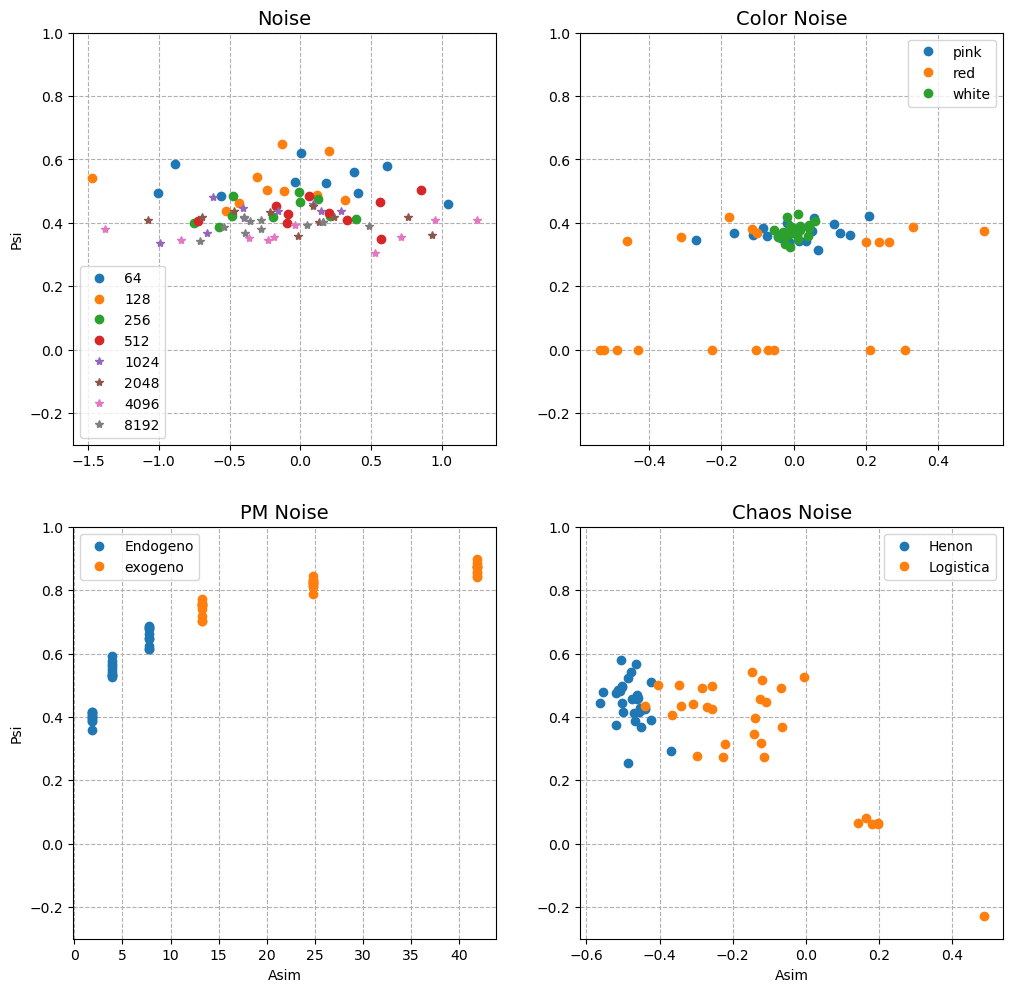

In [28]:
fig1 = plt.figure(figsize=(12,12),dpi=100)

plt.subplot(2,2,1)
plt.plot(frames_noise.Asim[frames_noise.Group == '64'],
         frames_noise.Psi[frames_noise.Group == '64'],'o',label = '64')
plt.plot(frames_noise.Asim[frames_noise.Group == '128'],
         frames_noise.Psi[frames_noise.Group == '128'],'o',label = '128')
plt.plot(frames_noise.Asim[frames_noise.Group == '256'],
         frames_noise.Psi[frames_noise.Group == '256'],'o',label = '256')
plt.plot(frames_noise.Asim[frames_noise.Group == '512'],
         frames_noise.Psi[frames_noise.Group == '512'],'o',label = '512')
plt.plot(frames_noise.Asim[frames_noise.Group == '1024'],
         frames_noise.Psi[frames_noise.Group == '1024'],'*',label = '1024')
plt.plot(frames_noise.Asim[frames_noise.Group == '2048'],
         frames_noise.Psi[frames_noise.Group == '2048'],'*',label = '2048')
plt.plot(frames_noise.Asim[frames_noise.Group == '4096'],
         frames_noise.Psi[frames_noise.Group == '4096'],'*',label = '4096')
plt.plot(frames_noise.Asim[frames_noise.Group == '8192'],
         frames_noise.Psi[frames_noise.Group == '8192'],'*',label = '8192')
plt.title('Noise',fontsize=14)
plt.ylim(-0.3,1)
#plt.xlim(-2,27)
plt.ylabel('Psi')
plt.grid('on',linestyle='--')
plt.legend()

plt.subplot(2,2,2)
plt.plot(frames_color.Asim[frames_color.Group == 'pink'],
           frames_color.Psi[frames_color.Group == 'pink'],'o',label = 'pink')
plt.plot(frames_color.Asim[frames_color.Group == 'red'],
           frames_color.Psi[frames_color.Group == 'red'],'o',label = 'red')
plt.plot(frames_color.Asim[frames_color.Group == 'white'],
           frames_color.Psi[frames_color.Group == 'white'],'o',label = 'white')
plt.title('Color Noise',fontsize=14)
plt.ylim(-0.3,1)
#plt.xlim(-2,27)
plt.grid('on',linestyle='--')
plt.legend()

plt.subplot(2,2,3)
plt.plot(frames_pm.Asim[frames_pm.Group == 'Endogeno'],
           frames_pm.Psi[frames_pm.Group == 'Endogeno'],'o',label = 'Endogeno')
plt.plot(frames_pm.Asim[frames_pm.Group == 'exogeno'],
           frames_pm.Psi[frames_pm.Group == 'exogeno'],'o',label = 'exogeno')
plt.title('PM Noise',fontsize=14)
plt.ylim(-0.3,1)
#plt.xlim(-2,27)
plt.ylabel('Psi')
plt.xlabel('Asim')
plt.grid('on',linestyle='--')
plt.legend()

plt.subplot(2,2,4)
plt.plot(frames_chaos.Asim[frames_chaos.Group == 'Henon'],
           frames_chaos.Psi[frames_chaos.Group == 'Henon'],'o',label = 'Henon')
plt.plot(frames_chaos.Asim[frames_chaos.Group == 'Logistica'],
           frames_chaos.Psi[frames_chaos.Group == 'Logistica'],'o',label = 'Logistica')
plt.title('Chaos Noise',fontsize=14)
plt.ylim(-0.3,1)
#plt.xlim(-2,27)
plt.xlabel('Asim')
plt.grid('on',linestyle='--')
plt.legend()

## Espectro de Singularidades

## Noise

In [29]:
a_noise64 = np.zeros([18,10])
f_noise64 = np.zeros([18,10])

a_noise128 = np.zeros([18,10])
f_noise128 = np.zeros([18,10])

a_noise256 = np.zeros([18,10])
f_noise256 = np.zeros([18,10])

a_noise512 = np.zeros([18,10])
f_noise512 = np.zeros([18,10])

a_noise1024 = np.zeros([18,10])
f_noise1024 = np.zeros([18,10])

a_noise2048 = np.zeros([18,10])
f_noise2048 = np.zeros([18,10])

a_noise4096 = np.zeros([18,10])
f_noise4096 = np.zeros([18,10])

a_noise8192 = np.zeros([18,10])
f_noise8192 = np.zeros([18,10])

for i in range(10):

    timeMeasure,dataMeasure,scales,stats_64,q = getMSSByUpscaling(noise64_norm[:,i])
    timeMeasure,dataMeasure,scales,stats_128,q = getMSSByUpscaling(noise128_norm[:,i])
    timeMeasure,dataMeasure,scales,stats_256,q = getMSSByUpscaling(noise256_norm[:,i])
    timeMeasure,dataMeasure,scales,stats_512,q = getMSSByUpscaling(noise512_norm[:,i])
    timeMeasure,dataMeasure,scales,stats_1024,q = getMSSByUpscaling(noise1024_norm[:,i])
    timeMeasure,dataMeasure,scales,stats_2048,q = getMSSByUpscaling(noise2048_norm[:,i])
    timeMeasure,dataMeasure,scales,stats_4096,q = getMSSByUpscaling(noise4096_norm[:,i])
    timeMeasure,dataMeasure,scales,stats_8192,q = getMSSByUpscaling(noise8192_norm[:,i])
    
    a_noise64[:,i] = stats_64['LH'][:,0]
    f_noise64[:,i] = stats_64['f'][:,0]

    a_noise128[:,i] = stats_128['LH'][:,0]
    f_noise128[:,i] = stats_128['f'][:,0]

    a_noise256[:,i] = stats_256['LH'][:,0]
    f_noise256[:,i] = stats_256['f'][:,0]

    a_noise512[:,i] = stats_512['LH'][:,0]
    f_noise512[:,i] = stats_512['f'][:,0]

    a_noise1024[:,i] = stats_1024['LH'][:,0]
    f_noise1024[:,i] = stats_1024['f'][:,0]

    a_noise2048[:,i] = stats_2048['LH'][:,0]
    f_noise2048[:,i] = stats_2048['f'][:,0]

    a_noise4096[:,i] = stats_4096['LH'][:,0]
    f_noise4096[:,i] = stats_4096['f'][:,0]

    a_noise8192[:,i] = stats_8192['LH'][:,0]
    f_noise8192[:,i] = stats_8192['f'][:,0]

## Color Noise

In [30]:
a_white = np.zeros([18,20])
f_white = np.zeros([18,20])

a_pink = np.zeros([18,20])
f_pink = np.zeros([18,20])

a_red = np.zeros([18,20])
f_red = np.zeros([18,20])

for i in range(20):

    timeMeasure,dataMeasure,scales,stats_white,q = getMSSByUpscaling(white_norm[:,i])
    timeMeasure,dataMeasure,scales,stats_pink,q = getMSSByUpscaling(pink_norm[:,i])
    timeMeasure,dataMeasure,scales,stats_red,q = getMSSByUpscaling(red_norm[:,i])
    
    a_white[:,i] = stats_white['LH'][:,0]
    f_white[:,i] = stats_white['f'][:,0]
    
    a_pink[:,i] = stats_pink['LH'][:,0]
    f_pink[:,i] = stats_pink['f'][:,0]
    
    a_red[:,i] = stats_red['LH'][:,0]
    f_red[:,i] = stats_red['f'][:,0]

## Pm Noise

In [31]:
endogeno_total = np.zeros([8192,30])
endogeno_total[:,0:10] = endogeno1_norm
endogeno_total[:,10:20] = endogeno2_norm
endogeno_total[:,20:30] = endogeno3_norm

exogeno_total = np.zeros([8192,30])
exogeno_total[:,0:10] = exogeno1_norm
exogeno_total[:,10:20] = exogeno2_norm
exogeno_total[:,20:30] = exogeno3_norm

a_endogeno = np.zeros([18,30])
f_endogeno = np.zeros([18,30])

a_exogeno = np.zeros([18,30])
f_exogeno = np.zeros([18,30])

for i in range(30):
    
    timeMeasure,dataMeasure,scales,stats_endogeno,q = getMSSByUpscaling(endogeno_total[:,i])
    timeMeasure,dataMeasure,scales,stats_exogeno,q = getMSSByUpscaling(exogeno_total[:,i])

    a_endogeno[:,i] = stats_endogeno['LH'][:,0]
    f_endogeno[:,i] = stats_endogeno['f'][:,0]

    a_exogeno[:,i] = stats_exogeno['LH'][:,0]
    f_exogeno[:,i] = stats_exogeno['f'][:,0]

## Chaos Noise

In [32]:
a_logistica = np.zeros([18,30])
f_logistica = np.zeros([18,30])

a_henon = np.zeros([18,30])
f_henon = np.zeros([18,30])

for i in range(30):
    
    timeMeasure,dataMeasure,scales,stats_logistica,q = getMSSByUpscaling(logistica_norm[:,i])
    timeMeasure,dataMeasure,scales,stats_henon,q = getMSSByUpscaling(henon[:,i])
    
    a_logistica[:,i] = stats_logistica['LH'][:,0]
    f_logistica[:,i] = stats_logistica['f'][:,0]

    a_henon[:,i] = stats_henon['LH'][:,0]
    f_henon[:,i] = stats_henon['f'][:,0]

## Figuras

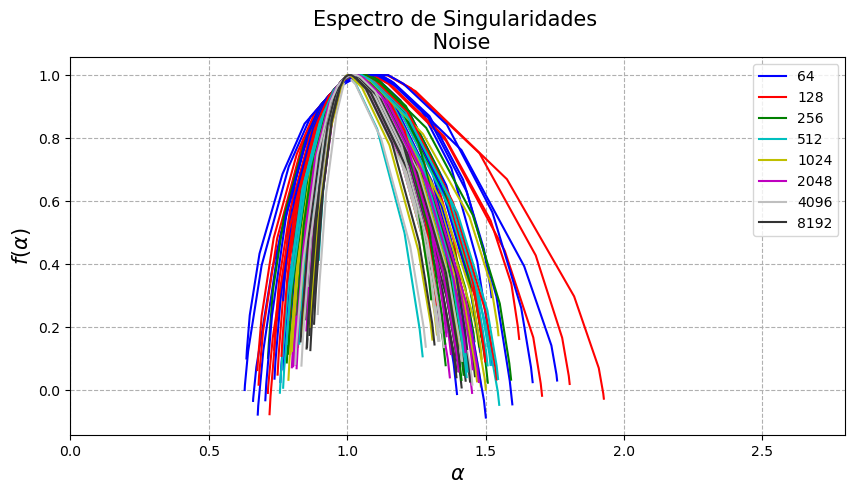

In [33]:
fig, ax = plt.subplots(figsize=(10,5),dpi=100)
for i in range(10):
    plt.plot(a_noise64[:,i],f_noise64[:,i],'b',label='64')
    plt.plot(a_noise128[:,i],f_noise128[:,i],'r',label='128')
    plt.plot(a_noise256[:,i],f_noise256[:,i],'g',label='256')
    plt.plot(a_noise512[:,i],f_noise512[:,i],'c',label='512')
    plt.plot(a_noise1024[:,i],f_noise1024[:,i],'y',label='1024')
    plt.plot(a_noise2048[:,i],f_noise2048[:,i],'m',label='2048')
    plt.plot(a_noise4096[:,i],f_noise4096[:,i],color='0.75',label='4096')
    plt.plot(a_noise8192[:,i],f_noise8192[:,i],color='0.2',label='8192')
    plt.title('Espectro de Singularidades \n Noise',fontsize=15)
    plt.grid('on',linestyle='--')
    plt.xlim(0,2.8)
    plt.xlabel(r'$\alpha$',fontsize=15)
    plt.ylabel(r'$f(\alpha)$',fontsize=15)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

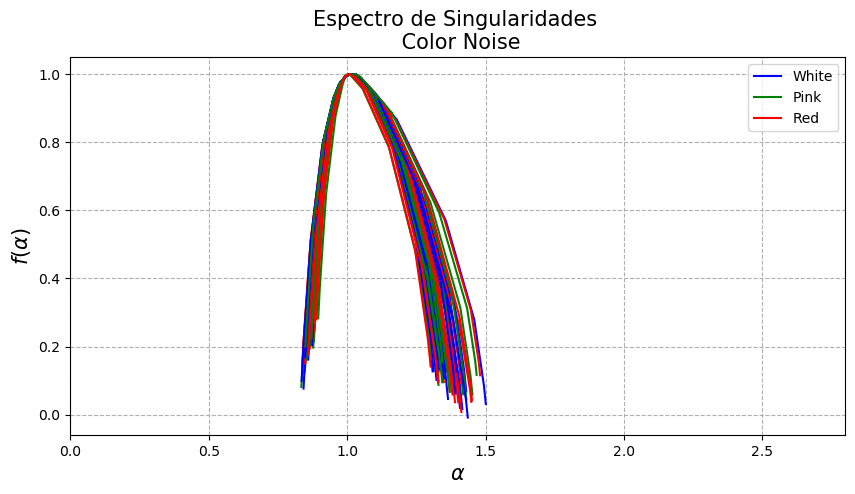

In [34]:
fig, ax = plt.subplots(figsize=(10,5),dpi=100)
for i in range(20):
    plt.plot(a_white[:,i],f_white[:,i],'b',label='White')
    plt.plot(a_pink[:,i],f_pink[:,i],'g',label='Pink')
    plt.plot(a_red[:,i],f_red[:,i],'r',label='Red')
    plt.title('Espectro de Singularidades \n Color Noise',fontsize=15)
    plt.grid('on',linestyle='--')
    plt.xlim(0,2.8)
    plt.xlabel(r'$\alpha$',fontsize=15)
    plt.ylabel(r'$f(\alpha)$',fontsize=15)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

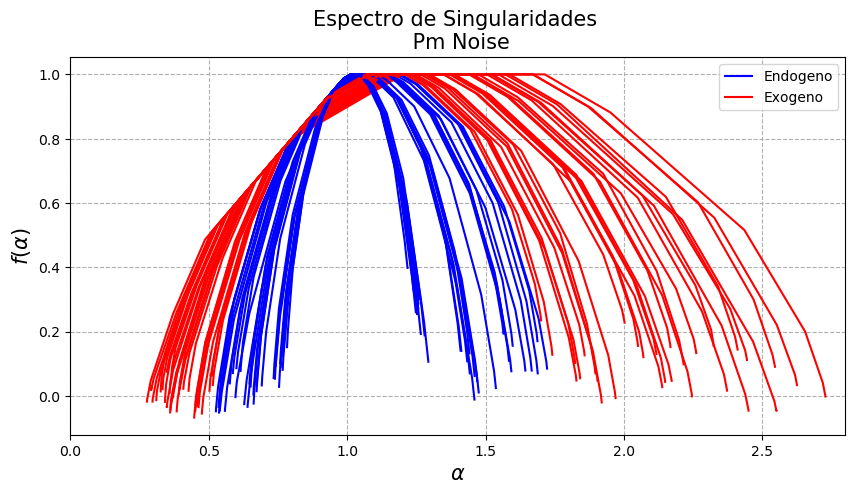

In [35]:
fig, ax = plt.subplots(figsize=(10,5),dpi=100)
for i in range(30):
    plt.plot(a_endogeno[:,i],f_endogeno[:,i],'b',label='Endogeno')
    plt.plot(a_exogeno[:,i],f_exogeno[:,i],'r',label='Exogeno')
    plt.title('Espectro de Singularidades \n Pm Noise',fontsize=15)
    plt.grid('on',linestyle='--')
    plt.xlim(0,2.8)
    plt.xlabel(r'$\alpha$',fontsize=15)
    plt.ylabel(r'$f(\alpha)$',fontsize=15)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

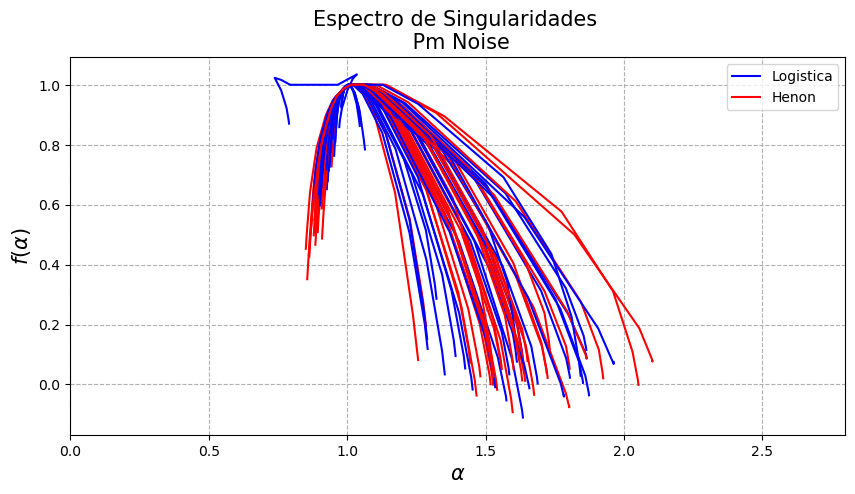

In [36]:
fig, ax = plt.subplots(figsize=(10,5),dpi=100)
for i in range(30):
    plt.plot(a_logistica[:,i],f_logistica[:,i],'b',label='Logistica')
    plt.plot(a_henon[:,i],f_henon[:,i],'r',label='Henon')
    plt.title('Espectro de Singularidades \n Pm Noise',fontsize=15)
    plt.grid('on',linestyle='--')
    plt.xlim(0,2.8)
    plt.xlabel(r'$\alpha$',fontsize=15)
    plt.ylabel(r'$f(\alpha)$',fontsize=15)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

# Espectro de Singularidades

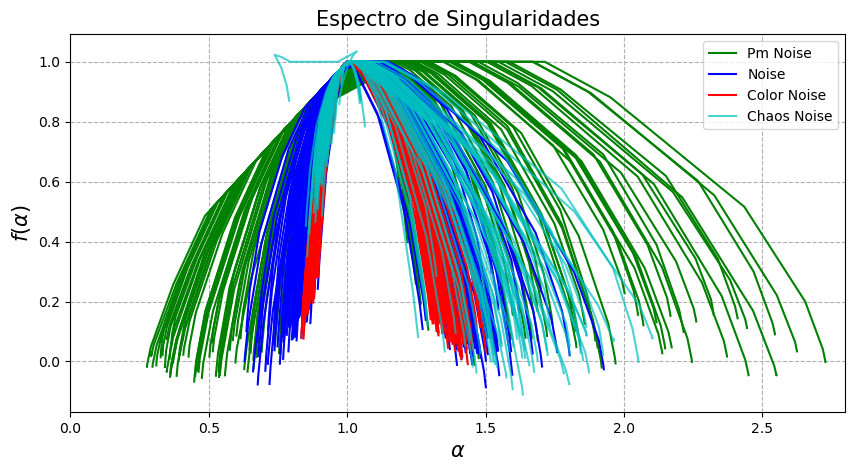

In [37]:
fig, ax = plt.subplots(figsize=(10,5),dpi=100)

for i in range(30):
    plt.plot(a_endogeno[:,i],f_endogeno[:,i],'g',label='Pm Noise')
    plt.plot(a_exogeno[:,i],f_exogeno[:,i],'g',label='Pm Noise')

    
for i in range(10):
    plt.plot(a_noise64[:,i],f_noise64[:,i],'b',label='Noise')
    plt.plot(a_noise128[:,i],f_noise128[:,i],'b',label='Noise')
    plt.plot(a_noise256[:,i],f_noise256[:,i],'b',label='Noise')
    plt.plot(a_noise512[:,i],f_noise512[:,i],'b',label='Noise')
    plt.plot(a_noise1024[:,i],f_noise1024[:,i],'b',label='Noise')
    plt.plot(a_noise2048[:,i],f_noise2048[:,i],'b',label='Noise')
    plt.plot(a_noise4096[:,i],f_noise4096[:,i],color='b',label='Noise')
    plt.plot(a_noise8192[:,i],f_noise8192[:,i],color='b',label='Noise')
    
for i in range(20):
    plt.plot(a_white[:,i],f_white[:,i],'r',label='Color Noise')
    plt.plot(a_pink[:,i],f_pink[:,i],'r',label='Color Noise')
    plt.plot(a_red[:,i],f_red[:,i],'r',label='Color Noise')
    
for i in range(30):
    plt.plot(a_logistica[:,i],f_logistica[:,i],'c',label='Chaos Noise',alpha=0.7)
    plt.plot(a_henon[:,i],f_henon[:,i],'c',label='Chaos Noise',alpha=0.7)
    
    
plt.title('Espectro de Singularidades',fontsize=15)
plt.grid('on',linestyle='--')        
plt.xlabel(r'$\alpha$',fontsize=15)
plt.ylabel(r'$f(\alpha)$',fontsize=15)
plt.xlim(0,2.8)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

## De todas as famílias utilizadas neste trabalho, como pode ser visto na figura anterior, as séries do tipo A apresentam a maior dimensão fractal, enquanto no caso de C as três subfamílias apresentam quase a mesma dimensão fractal entre elas e seus o tempo entre todos é a menor dimensão.